<a href="https://colab.research.google.com/github/ShuangAnatoli/Machine-Learning/blob/main/DecisionTrees/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree


#Downloading dataset

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2023-01-31 05:15:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2023-01-31 05:15:31 (506 MB/s) - ‘drug200.csv’ saved [5827/5827]



#Exploring the Datasets

In [ ]:
df = pd.read_csv("drug200.csv",delimiter=",")
df = pd.DataFrame(df)
df[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape
#shape is a property not a method so no ()

(200, 6)

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


#Pre-processing

In [ ]:
#dataframe to array? Feature Matrix
X = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
from sklearn import preprocessing
#female 0 male 1
le_sex = preprocessing.LabelEncoder()
le_sex.fit(["F", "M"])
X[:,1] = le_sex.transform(X[:,1])

#high 0 low 1 normal 2
le_BP = preprocessing.LabelEncoder()
le_BP.fit(["LOW", "NORMAL", "HIGH"])
X[:,2] = le_BP.transform(X[:,2])

#high 0 normal 1
le_C = preprocessing.LabelEncoder()
le_C.fit(["NORMAL", "HIGH"])
X[:,3] = le_BP.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

#Setting Up Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.3, random_state = 3)
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)

(140, 5)
(140,)
(60, 5)
(60,)


#Modeling

In [ ]:
drugTree = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#Prediction

In [ ]:
predTree = drugTree.predict(X_testset)

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


#Evaluation

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print(metrics.accuracy_score(y_testset, predTree))


0.9833333333333333


#Visualization

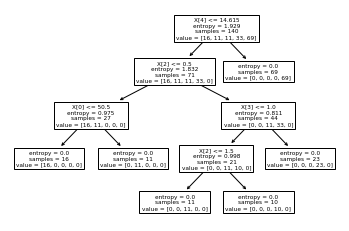

In [ ]:
tree.plot_tree(drugTree)
plt.show()